In [84]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [85]:
#rasterio.windows.Window(col_off, row_off, width, height)
date = '2019-01-22'
window = rasterio.windows.Window(1500, 5000, 1500, 1500)

filepath2 = '/Users/Wenjin/Python/LC08_L1TP_041036_20190122_20190205_01_T1/LC08_L1TP_041036_20190122_20190205_01_T1_B3.TIF'
with rasterio.open(filepath2) as src:
    blue = src.read(1, window=window)
    
filepath3 = '/Users/Wenjin/Python/LC08_L1TP_041036_20190122_20190205_01_T1/LC08_L1TP_041036_20190122_20190205_01_T1_B3.TIF'
with rasterio.open(filepath3) as src:
    grn = src.read(1, window=window)

filepath4 = '/Users/Wenjin/Python/LC08_L1TP_041036_20190122_20190205_01_T1/LC08_L1TP_041036_20190122_20190205_01_T1_B4.TIF'
with rasterio.open(filepath4) as src:
    print(src.profile)
    red = src.read(1,window=window)

filepath5 = '/Users/Wenjin/Python/LC08_L1TP_041036_20190122_20190205_01_T1/LC08_L1TP_041036_20190122_20190205_01_T1_B5.TIF'
with rasterio.open(filepath5) as src:
    print(src.profile)
    niv = src.read(1, window=window)
    
filepath6 = '/Users/Wenjin/Python/LC08_L1TP_041036_20190122_20190205_01_T1/LC08_L1TP_041036_20190122_20190205_01_T1_B6.TIF'
with rasterio.open(filepath6) as src:
    swir = src.read(1, window=window)
    
# read color band tifs

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7751, 'height': 7881, 'count': 1, 'crs': CRS.from_dict(init='epsg:32611'), 'transform': Affine(30.0, 0.0, 265485.0,
       0.0, -30.0, 3948315.0), 'tiled': False, 'interleave': 'band'}
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7751, 'height': 7881, 'count': 1, 'crs': CRS.from_dict(init='epsg:32611'), 'transform': Affine(30.0, 0.0, 265485.0,
       0.0, -30.0, 3948315.0), 'tiled': False, 'interleave': 'band'}


In [86]:
# grid values normalization
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min)) * 2

Nred = normalize(red)
Ngrn = normalize(grn)
Nblue = normalize(blue)
Nnir = normalize(nir)


Text(0, 0.5, 'Row #')

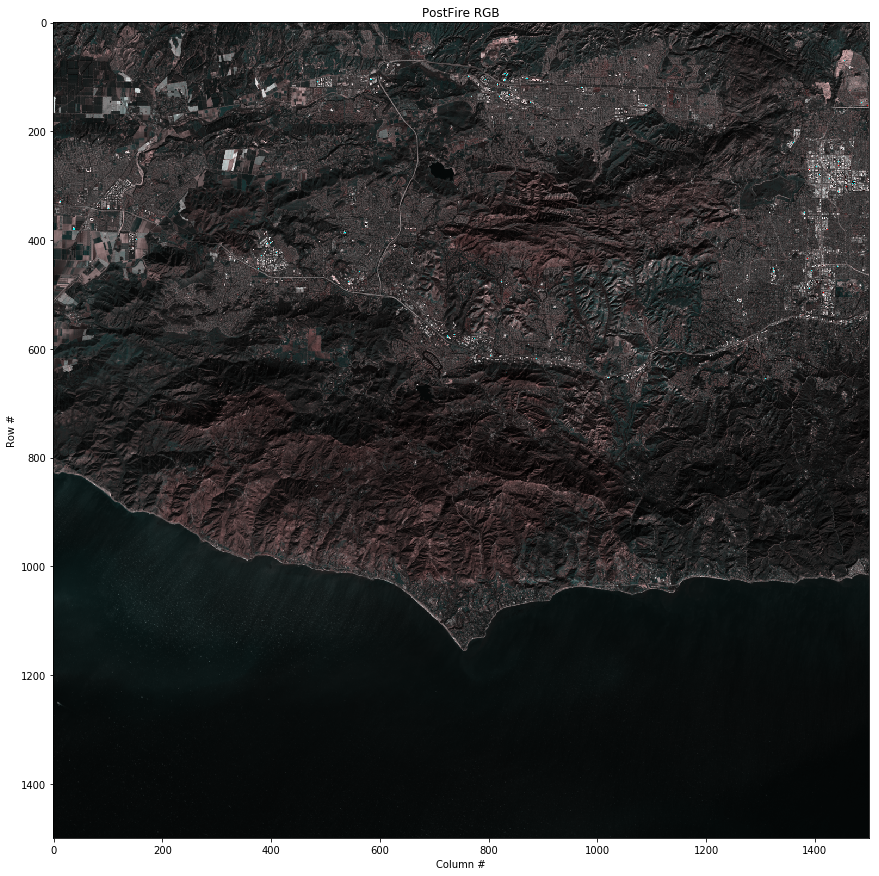

In [87]:
np.mat(1500) * np.mat(1500) # dismiss operands error
rgb = np.dstack((Nred,Ngrn,Nblue)) #stack rgb plot

plt.figure(figsize=(15,15))
plt.imshow((rgb * 255).astype(np.uint8))
plt.title('PostFire RGB'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')

Text(0, 0.5, 'Row #')

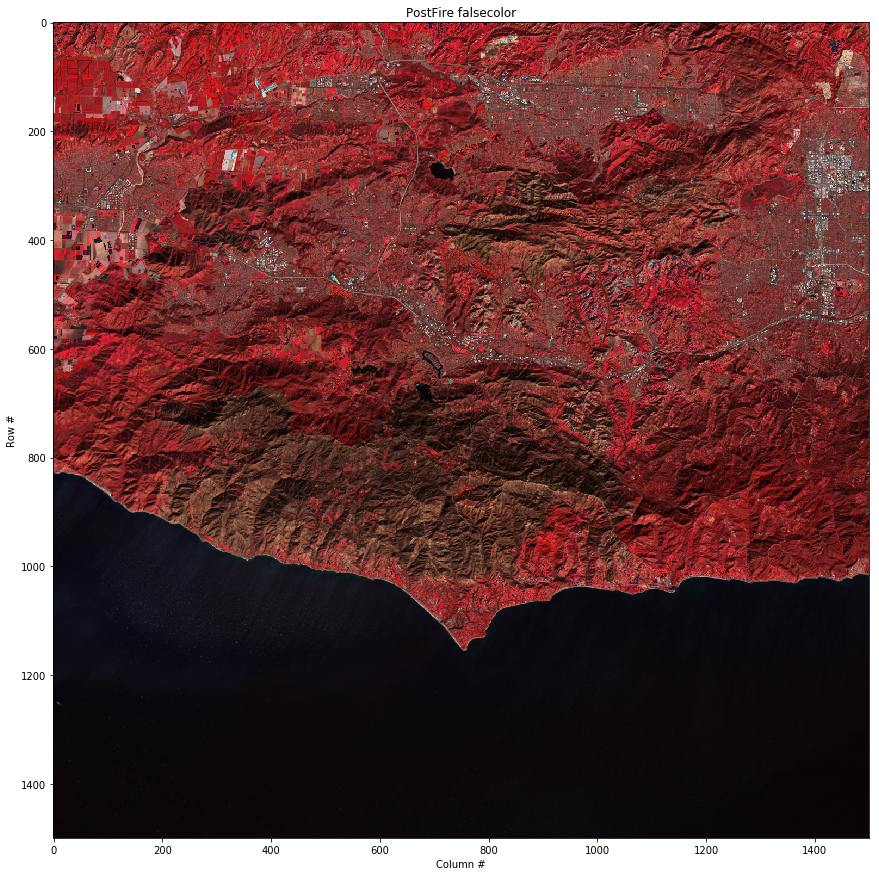

In [88]:
np.mat(1500) * np.mat(1500)
fcp = np.dstack((Nnir,Nred,Ngrn)) #stack false color plot

plt.figure(figsize=(15,15))
plt.imshow((fcp * 255).astype(np.uint8))
plt.title('PostFire falsecolor'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')

Text(0, 0.5, 'Row #')

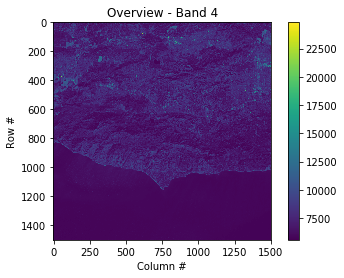

In [91]:
np.mat(1500) * np.mat(1500)    
plt.imshow(red)
plt.colorbar()
plt.title('Overview - Band 4')
plt.xlabel('Column #')
plt.ylabel('Row #')

# plot band 4(Red) overview

Text(0, 0.5, 'Row #')

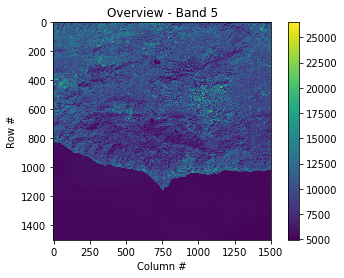

In [92]:
window = rasterio.windows.Window(1500, 5000, 1500, 1500)
    
np.mat(1500) * np.mat(1500)
plt.imshow(niv)
plt.colorbar()
plt.title('Overview - Band 5')
plt.xlabel('Column #')
plt.ylabel('Row #')

# plot band 5(NIR) overview

Text(0, 0.5, 'Row #')

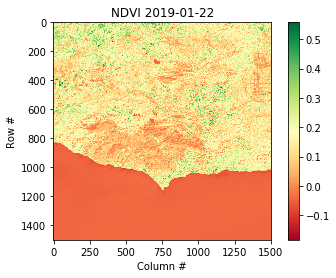

In [96]:
#this function can be applied to NDVI and mNDWI
def calc(dat1,dat2):
    dat1 = dat1.astype('f4')
    dat2 = dat2.astype('f4')
    calc_outcome = (dat1 - dat2) / (dat1 + dat2) #ls8 calc equation
    return calc_outcome

np.mat(1500) * np.mat(1500)
ndvi = calc(nir,red) 
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar()
plt.title('NDVI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')
#plot calculated ndvi

Text(0, 0.5, 'Row #')

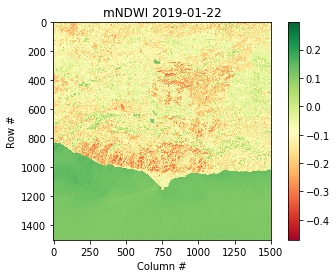

In [97]:
window = rasterio.windows.Window(1500, 5000, 1500, 1500)

np.mat(1500) * np.mat(1500)
mNDWI = calc(grn,swir) #call calc function for mNDWI
plt.imshow(mNDWI, cmap='RdYlGn')
plt.colorbar()
plt.title('mNDWI {}'.format(date))
plt.xlabel('Column #')
plt.ylabel('Row #')
#plot calc mNDWI